**Importing Libraries**

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.utils import class_weight

**Importing the Dataset** 

In [147]:
fetal_dataset = pd.read_csv('fetal_health.csv')

**EXPLORATORY DATA ANALYSIS**

**Checking the Dataset**

In [148]:
fetal_dataset.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

***Inspecting the features for the first 15 instances in the dataset***

In [137]:
fetal_dataset.head(15)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.000,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.000,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.000,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.000,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


***Checking the number of rows and columns in the data set***

In [138]:
fetal_dataset.shape

(2126, 22)

**Checking the type of data**


In [139]:
fetal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

**Changing the data type of the Class/Categories to int**

In [12]:
fetal_dataset['fetal_health'] = fetal_dataset['fetal_health'].astype('int')
fetal_dataset['fetal_health']

0       2
1       1
2       1
3       1
4       1
       ..
2121    2
2122    2
2123    2
2124    2
2125    1
Name: fetal_health, Length: 2126, dtype: int64

In [10]:
fetal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

**Checking the array of distinct values in the Class**

In [11]:
fetal_dataset['fetal_health'].unique()

array([2, 1, 3])

**Check for missing values within the dataset**

In [12]:
fetal_dataset.isnull().sum() # Checking for Missing/Null Values in the dataset

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

**Checking for duplicates in the dataset** # The duplicates are 13 and no enough evidence that they are truly duplicates, ignored

In [13]:
print(f"There are {fetal_dataset.duplicated().sum()} duplicates data")
fetal_dataset.loc[fetal_dataset.duplicated(keep=False)].sort_values(by=fetal_dataset.columns.to_list())

There are 13 duplicates data


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1112,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1
1113,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1
1114,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1
1115,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1
233,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1
229,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1
787,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1
790,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,...,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1
791,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,...,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1


**The Summary Statistics of the Dataset**

In [14]:
fetal_dataset.describe().T # T is used to transpose the table

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


**Identifying the input Features and the class within the dataset**

In [149]:
X = fetal_dataset.drop('fetal_health',axis=1)
y=fetal_dataset['fetal_health'] #

**Encoding and reassigning the categorical Variable**

In [150]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 0, 0, ..., 1, 1, 0])

**Checking the number of Observation in each class**

In [17]:
fetal_dataset.fetal_health.value_counts()

1    1655
2     295
3     176
Name: fetal_health, dtype: int64

**Percentage distribution of observation in each class**

In [18]:
fetal_dataset['fetal_health'].value_counts(normalize=True)*100

1    77.845720
2    13.875823
3     8.278457
Name: fetal_health, dtype: float64

**Plot of the number of observations in each class** (The classes are unbalanced. This can be a problem for the calculation of our predictive model.

The model could learn to perform much better class 1, which is more numerous, than the others. The strategy to proceed could be to try to balance the data and to verify the benefits. This will be done later in the notebook *italicized text* )

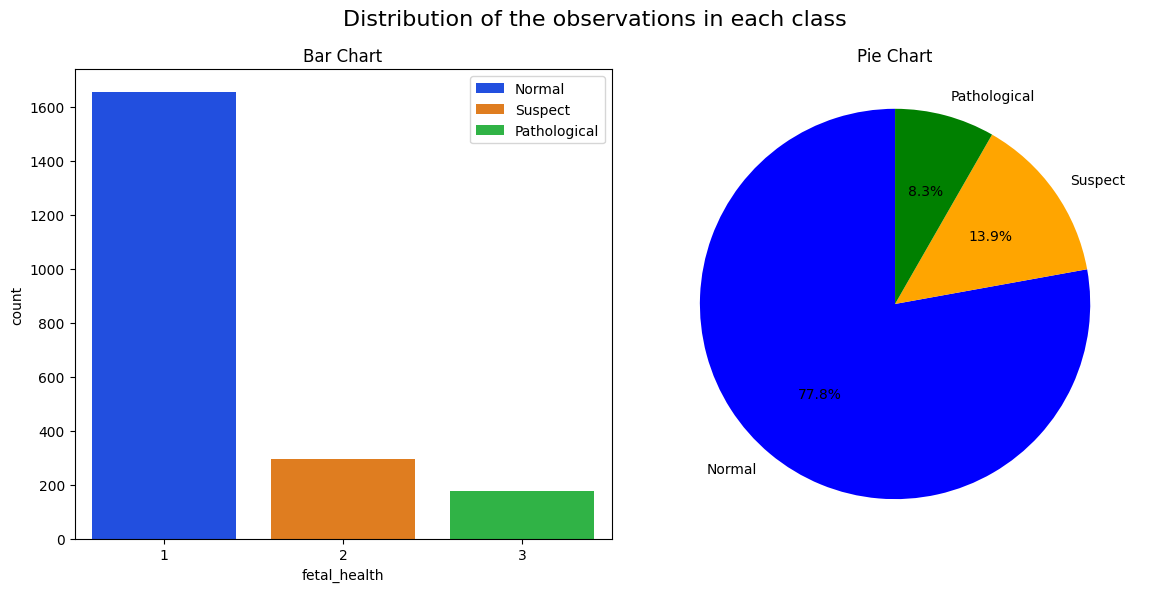

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=fetal_dataset, x='fetal_health', hue='fetal_health', palette='bright', dodge=False, ax=axes[0])
axes[0].set_title('Bar Chart')

# Set the labels for the bar chart
labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
legend_labels = [labels[i] for i in sorted(labels.keys())]
axes[0].legend(legend_labels)

counts = fetal_dataset['fetal_health'].value_counts()
axes[1].pie(counts, labels=legend_labels, colors=['blue', 'orange', 'green'], autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')
axes[1].set_title('Pie Chart')

plt.suptitle('Distribution of the observations in each class', fontsize=16)
plt.tight_layout()
plt.show()

**Plot of the Features**

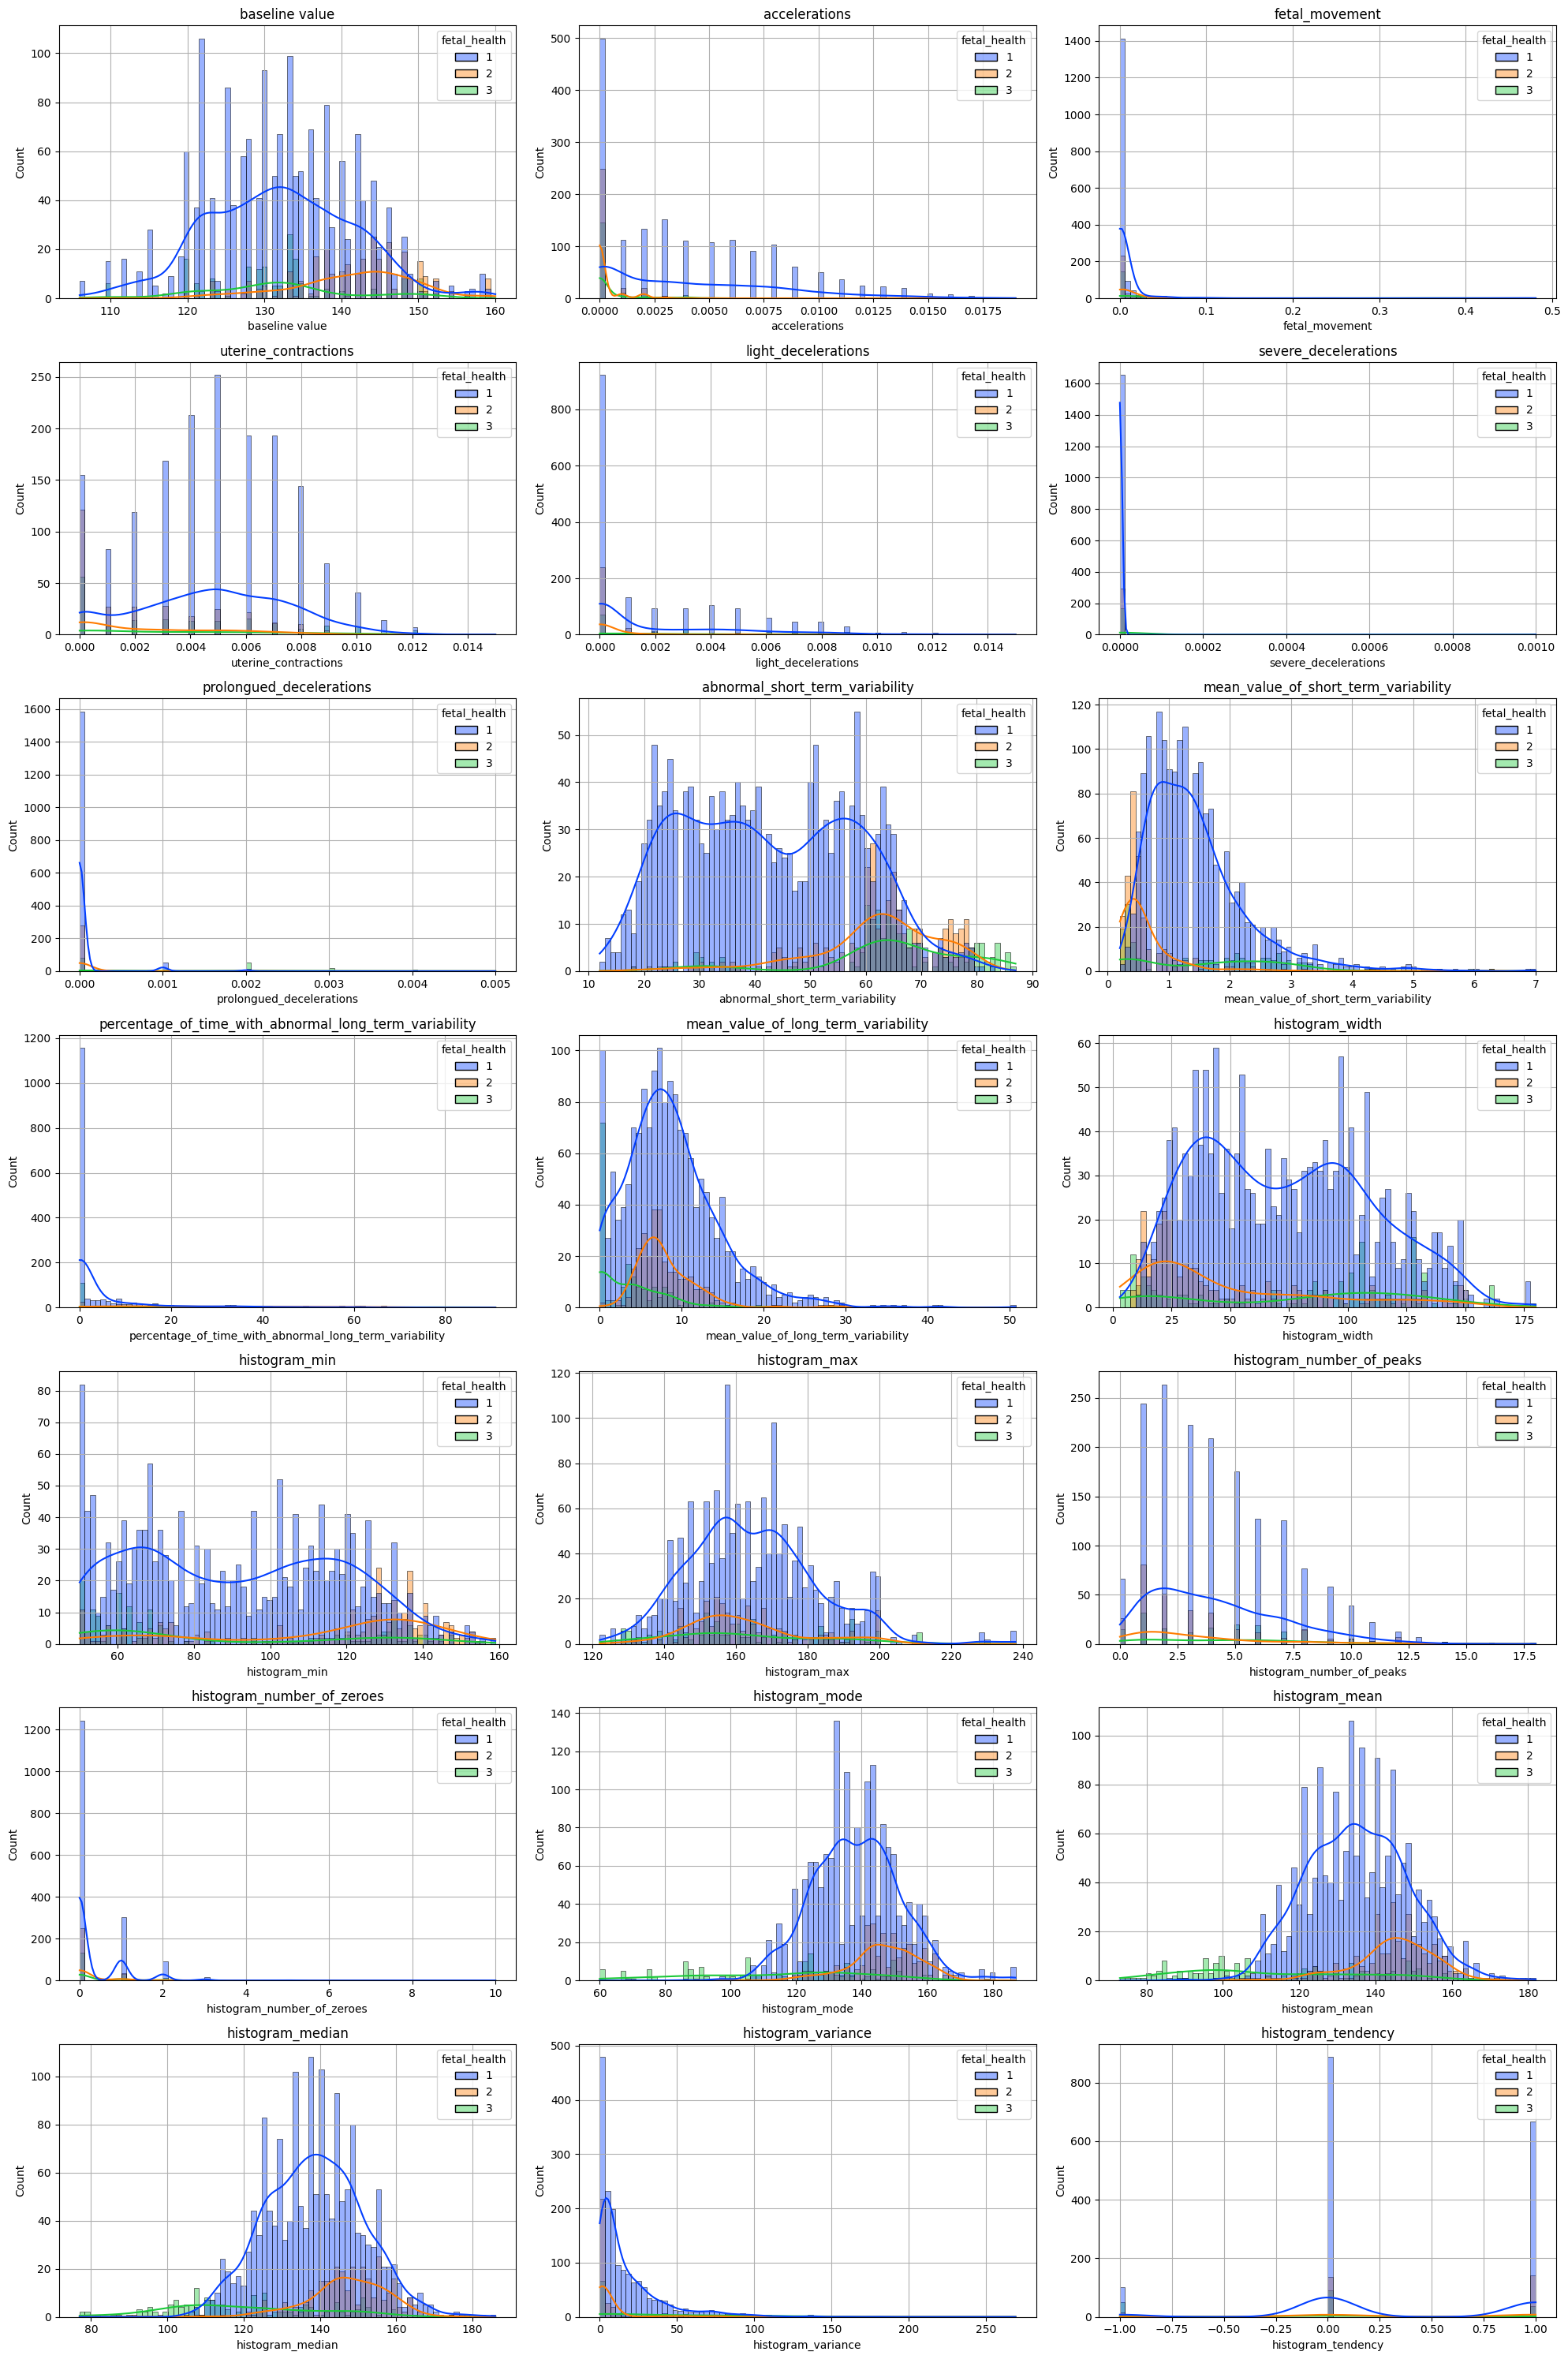

In [20]:
fig,ax=plt.subplots(7,3,figsize=(20,30))
ax=ax.ravel()
for i, col in enumerate(X.columns):
    sns.histplot(fetal_dataset,x=col,hue='fetal_health',kde=True,bins=80,ax=ax[i],palette='bright',alpha=0.4)
    ax[i].set_title(col)
    ax[i].grid()
plt.tight_layout()


**Checking Outliers (To be handled with a robust scalar)**

<Axes: >

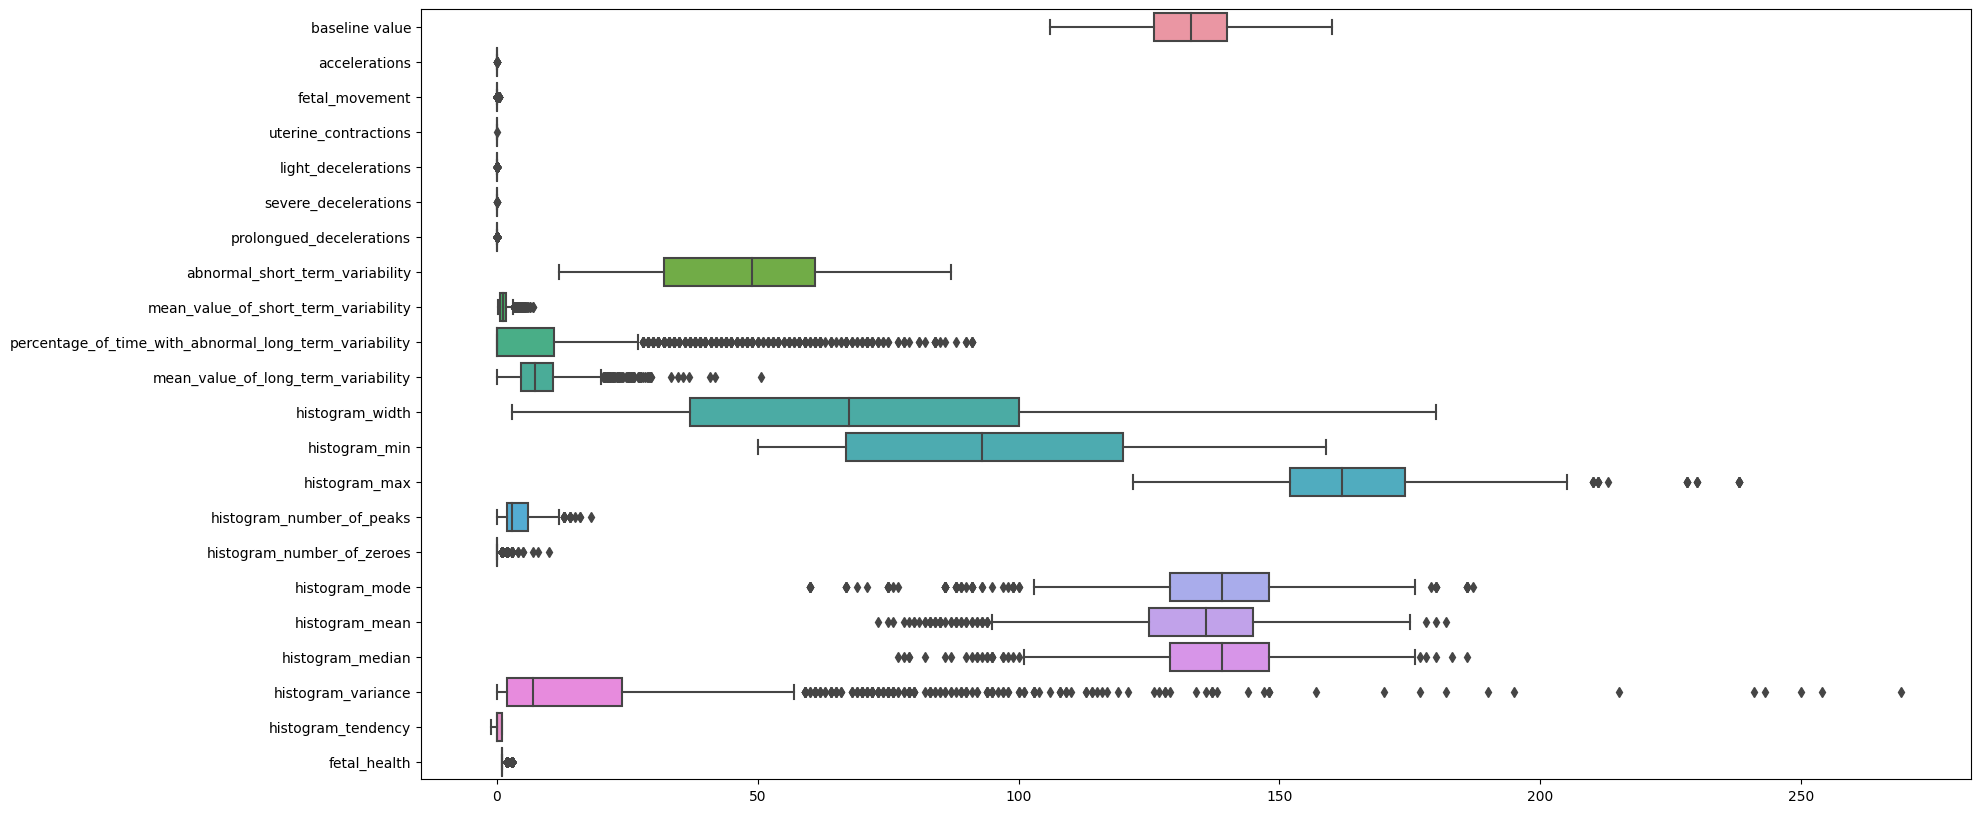

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(ax=ax, data=fetal_dataset,orient='h')

**Pairwise Correlation, Approach 1 for feature selection** 

In [22]:
cor = fetal_dataset.corr()
cor

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


**Visualising the Correlation with heatmap**

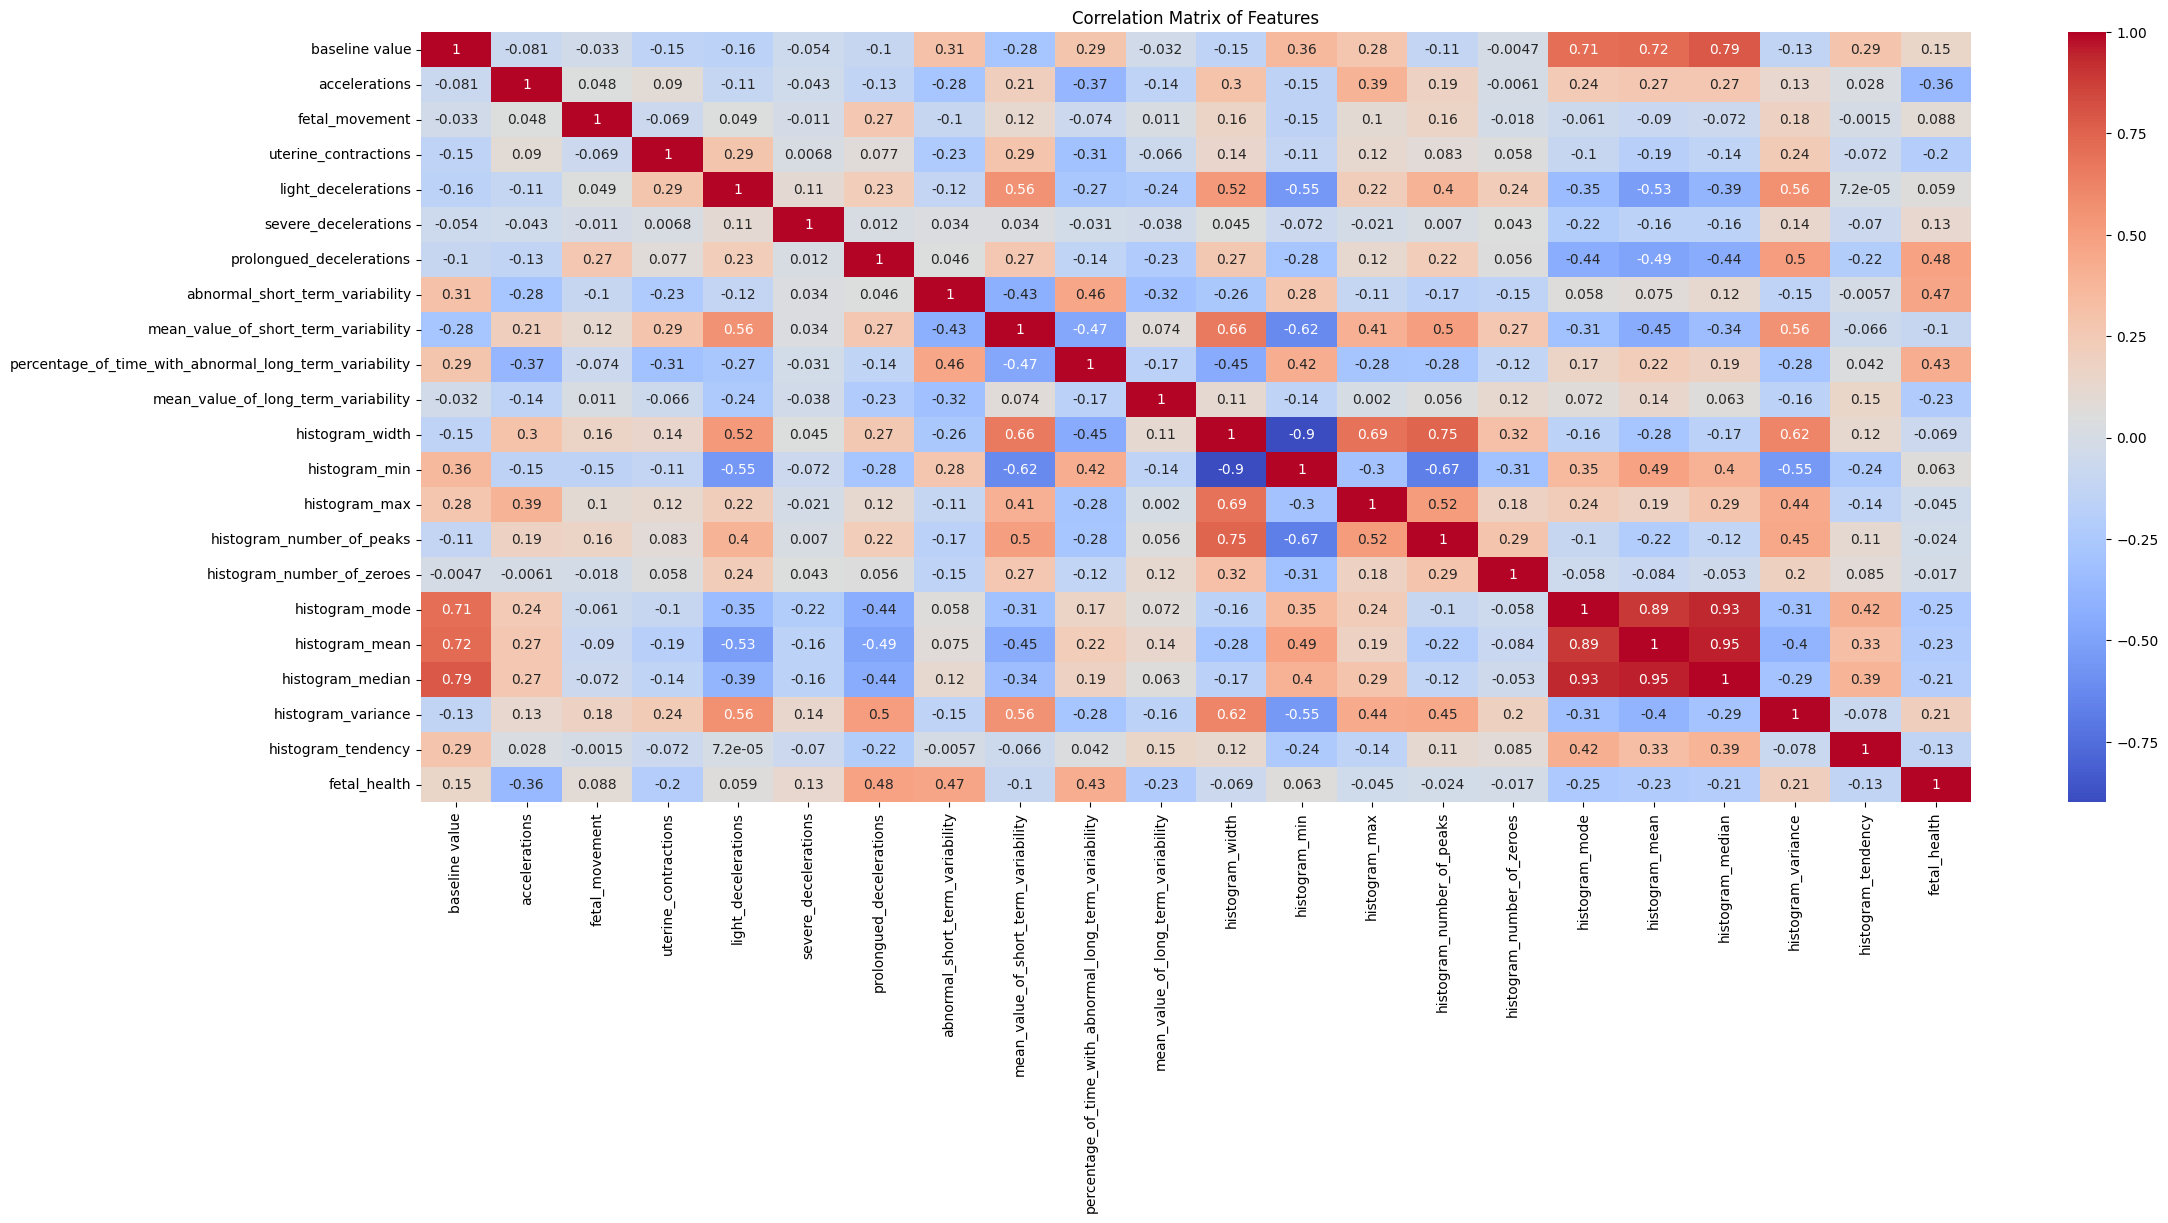

In [23]:
correlation_matrix = fetal_dataset.corr()
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

**Correlational Matrix to check the Important Features, Approach 2**

In [24]:
cor_Mat = abs(cor['fetal_health'])
Cor_important_features =cor_Mat[cor_Mat > 0.1]
Cor_important_features = Cor_important_features.index.tolist()
Cor_important_features

['baseline value',
 'accelerations',
 'uterine_contractions',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency',
 'fetal_health']

**KBest feature selection(Approach 3)**

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif
k = 14
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)
K_selected_feature_indices = selector.get_support(indices=True)
K_selected_feature_names = X.columns[K_selected_feature_indices]
K_selected_feature_names

Index(['baseline value', 'accelerations', 'uterine_contractions',
       'light_decelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_min',
       'histogram_mode', 'histogram_mean', 'histogram_median',
       'histogram_variance'],
      dtype='object')

**Splitting the data into training and test set**

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
X_train.shape, X_test.shape

((1700, 21), (426, 21))

**Features Scaling**

In [157]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled,X_test_scaled

(array([[ 0.78571429,  0.4       ,  0.        , ...,  0.78947368,
          0.        ,  1.        ],
        [ 0.85714286,  0.        ,  0.        , ...,  0.89473684,
         -0.18181818,  1.        ],
        [ 0.28571429,  1.8       ,  1.33333333, ...,  0.36842105,
          0.04545455,  0.        ],
        ...,
        [-0.92857143, -0.4       ,  0.        , ..., -0.94736842,
         -0.22727273,  1.        ],
        [-0.35714286,  1.        ,  0.        , ...,  0.26315789,
          1.77272727,  1.        ],
        [-0.07142857, -0.4       ,  0.        , ..., -0.47368421,
          0.81818182,  0.        ]]),
 array([[-0.5       ,  1.        ,  0.        , ..., -0.21052632,
         -0.04545455,  0.        ],
        [ 1.35714286, -0.4       ,  0.        , ...,  1.        ,
         -0.09090909,  1.        ],
        [ 1.07142857, -0.4       ,  0.        , ...,  0.63157895,
         -0.31818182,  1.        ],
        ...,
        [-0.21428571,  1.        ,  0.        , ..., -

**MODELS TRAINING, TESTING AND EVALUATION**

**TASK 1: Random Forest Classifier**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Compute Class weight**(Unbalanced observation in each class)

In [18]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {label: weight for label, weight in zip(np.unique(y_train), class_weights)}


**Implementing the Random Forest Classifier (Training and Testing)**

In [19]:
rf_classifier = RandomForestClassifier(class_weight=class_weights_dict)
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)

**Evaluate the performance of the Random Forest Classifier**

**Random Forest Classifier Report**

In [20]:
accuracy = accuracy_score(y_test, y_pred_rf)
Random_Classifier_Report = classification_report(y_test, y_pred_rf)
print("Accuracy:", accuracy )
print(Random_Classifier_Report)

Accuracy: 0.9460093896713615
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       328
           1       0.86      0.77      0.81        62
           2       0.97      0.94      0.96        36

    accuracy                           0.95       426
   macro avg       0.93      0.90      0.91       426
weighted avg       0.94      0.95      0.94       426



**Cross Validation of the Model with StratifiedKFold (Random Forest)**

In [22]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [23]:
stratified_kfold = StratifiedKFold(n_splits=10)
cv_scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=stratified_kfold)
print("Stratified Cross-Validation Scores:", cv_scores)
print("Mean Stratified CV Accuracy:", cv_scores.mean())

Stratified Cross-Validation Scores: [0.95882353 0.93529412 0.93529412 0.91764706 0.91764706 0.93529412
 0.93529412 0.97647059 0.90588235 0.95294118]
Mean Stratified CV Accuracy: 0.9370588235294118


**The Confusion Matrix**

In [24]:
C_Matrix_RF = confusion_matrix(y_test, y_pred_rf)
print(C_Matrix_RF)

[[321   7   0]
 [ 13  48   1]
 [  1   1  34]]


**Plot of the Confusion Matrix of Random Forest Classifier**

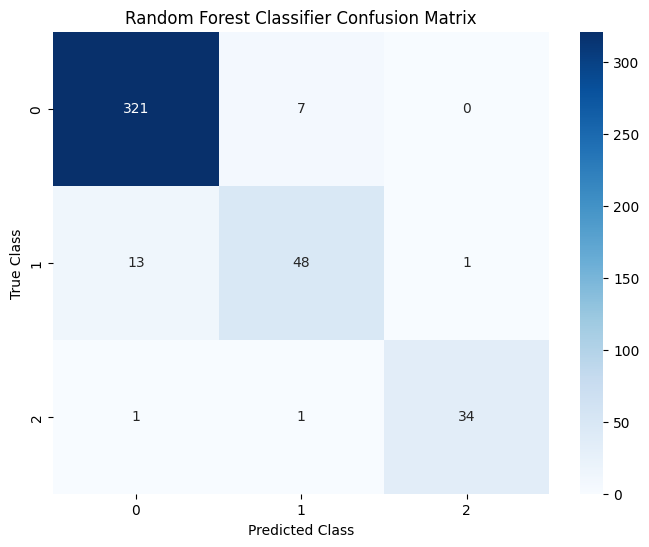

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(C_Matrix_RF, annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

**Hyperparameter Tuning of the Random Forest Classifier**

In [27]:
from sklearn.model_selection import GridSearchCV
params = {
    "random_state": [0,10, 20,30,40,50,60,70,80,90,100],
        "n_estimators": [10, 20, 30,40 ,50, 70,80,90, 100],
    "criterion": ["gini", "entropy"]
}
grid = GridSearchCV(rf_classifier , params, cv=stratified_kfold)
grid.fit(X_train_scaled, y_train)
print("Best hyperparameter:", grid.best_params_)

Best hyperparameter: {'criterion': 'entropy', 'n_estimators': 70, 'random_state': 0}


In [40]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")[["params", "mean_test_score", "rank_test_score"]]

,params,mean_test_score,rank_test_score
151,"{'criterion': 'entropy', 'n_estimators': 50, '...",0.948235,1
57,"{'criterion': 'gini', 'n_estimators': 70, 'ran...",0.947647,2
162,"{'criterion': 'entropy', 'n_estimators': 70, '...",0.947647,2
46,"{'criterion': 'gini', 'n_estimators': 50, 'ran...",0.947647,2
170,"{'criterion': 'entropy', 'n_estimators': 80, '...",0.947647,2
...,...,...,...
10,"{'criterion': 'gini', 'n_estimators': 10, 'ran...",0.932353,194
7,"{'criterion': 'gini', 'n_estimators': 10, 'ran...",0.932353,194
5,"{'criterion': 'gini', 'n_estimators': 10, 'ran...",0.931765,196
100,"{'criterion': 'entropy', 'n_estimators': 10, '...",0.930588,197


**TASK 2: Multilayer Perceptron (MLP) Classifier**

In [41]:
from sklearn.neural_network import MLPClassifier

**Implementing the MLP (Training and Testing)**

In [50]:
MLP_model= MLPClassifier(hidden_layer_sizes=(20, 15, 10), activation='logistic',max_iter=1700)

In [51]:
MLP_model.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 15, 10),
              max_iter=1700)

In [52]:
y_pred_MLP = MLP_model.predict(X_test_scaled)
y_pred_MLP

array([2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 2,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 1, 2,
       0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

**Evaluation of the MLP Performance**

**MLP Classification Report**

In [53]:
accuracy = MLP_model.score(X_test_scaled, y_test)
MLP_Report = classification_report(y_test, y_pred_MLP, digits=4)
print(MLP_Report)

              precision    recall  f1-score   support

           0     0.9419    0.9565    0.9492       322
           1     0.7037    0.6552    0.6786        58
           2     0.8667    0.8478    0.8571        46

    accuracy                         0.9038       426
   macro avg     0.8374    0.8198    0.8283       426
weighted avg     0.9013    0.9038    0.9024       426



**Cross Validation with stratifiedKfold (MLP)**

In [54]:
stratified_kfold = StratifiedKFold(n_splits=10)
cv_scores = cross_val_score(MLP_model, X_train_scaled, y_train, cv=stratified_kfold)
print("Stratified Cross-Validation Scores:", cv_scores)
print("Mean Stratified CV Accuracy:", cv_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1700) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1700) reached and the optimization hasn't converged yet.
  warnings.warn(


Stratified Cross-Validation Scores: [0.91176471 0.88235294 0.91176471 0.91764706 0.90588235 0.89411765
 0.92352941 0.95882353 0.9        0.89411765]
Mean Stratified CV Accuracy: 0.9099999999999999


**Confusion Matrix of the MLP Model**

In [55]:
C_Matrix_MLP = confusion_matrix(y_test, y_pred_MLP)
print(C_Matrix_MLP)

[[308  11   3]
 [ 17  38   3]
 [  2   5  39]]


**Plot of the Confusion Matrix of the MLP**

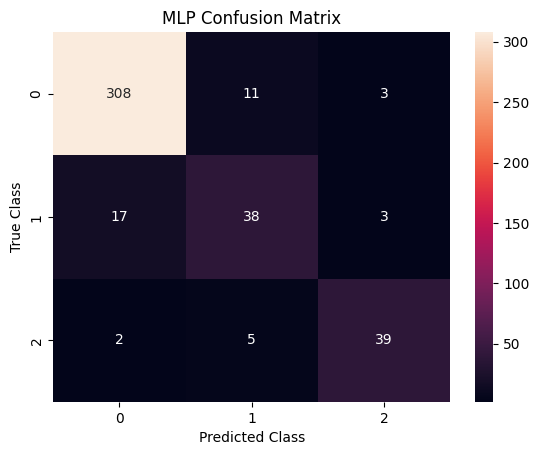

In [56]:
sns.heatmap(C_Matrix_MLP, annot=True, fmt="d")
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

**Hyperparameter Tuning of the MLP**

In [92]:
params = {
        "learning_rate": ['constant', 'invscaling', 'adaptive'],
        "solver": ['sgd', 'adam'],
        "random_state": [0,10, 20,30,40,50,60,70,80,90,100]       
    }
grid = GridSearchCV(MLP_model , params, cv=stratified_kfold)
grid.fit(X_train_scaled, y_train)
print("Best hyperparameter:", grid.best_params_)

NameError: ignored

**TASK 3: Convolutional Neural Network**

In [180]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

In [175]:
# Convert the features to a format that can be processed by a CNN
####X = X.to_numpy()  # Convert DataFrame to NumPy array
#X = X.reshape(-1, 21, 1)

**check**

In [181]:
#Learning rates, layer sizes, learners and activation functions (Architecture, InceptionNet)
X_train_scaled = X_train_scaled.reshape(-1, 21, 1)
X_test_scaled = X_test_scaled.reshape(-1, 21, 1)
y_train 
print("x sizes:", X_train_scaled.shape[0])
print("y sizes:", y_train.shape[0])

x sizes: 1700
y sizes: 1530


In [182]:
# Choose a CNN architecture
CNN_model = Sequential()

In [183]:
# Add convolutional layers
CNN_model.add(Conv1D(32, (3), activation='relu', input_shape=(21, 1)))
CNN_model.add(MaxPooling1D((2)))
CNN_model.add(Conv1D(64, (3), activation='relu'))
CNN_model.add(MaxPooling1D((2)))

# Add a flatten layer
CNN_model.add(Flatten())

# Add a dense layer
CNN_model.add(Dense(128, activation='relu'))

# Add an output layer
num_classes = len(label_encoder.classes_)
CNN_model.add(Dense(num_classes, activation='softmax'))

In [184]:
CNN_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 19, 32)            128       
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 9, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 7, 64)             6208      
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 3, 64)            0         
 g1D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 192)               0         
                                                                 
 dense_13 (Dense)            (None, 128)              

In [185]:
# Compile the model
CNN_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [177]:
#y_train = np.reshape(y_train, (-1, 1))  # Reshape labels to (None, 1)

In [186]:
# Train the model
CNN_model.fit(X_train_scaled, y_train, epochs=10)

ValueError: ignored

**Evaluate the Performance of the CNN Model**

In [187]:
test_loss, test_acc= CNN_model.evaluate(X_train_scaled, y_train, verbose=0)
loss_scores.append(test_loss)
accuracy_scores.append(test_acc)
print('\n Test Loss:', test_loss)
print('\n Test Accuracy:', test_acc)

ValueError: ignored

**Cross validation of the CNN**

In [166]:
# Initialize lists to store evaluation results
accuracy_scores = []
loss_scores = []

In [167]:
stratified_kfold = StratifiedKFold(n_splits=10)

In [172]:
for train_index, test_index in stratified_kfold.split(X_train_scaled, X_test):
    X_train, X_test = X_train_scaled[train_index], X_test_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]


ValueError: ignored

In [171]:
avg_loss = np.mean(loss_scores)
avg_accuracy = np.mean(accuracy_scores)
print("Average loss:", avg_loss)
print("Average accuracy:", avg_accuracy)

Average loss: nan
Average accuracy: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



**TASK 4: Clustering**

In [80]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
# Elbow method to determine optimal number of clusters
def elbow_method(fetal_dataset, max_clusters):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(fetal_dataset)
        inertias.append(kmeans.inertia_)
    return inertias

In [11]:
# Plotting the elbow curve
def plot_elbow_curve(inertias):
    plt.plot(range(1, len(inertias) + 1), inertias, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Curve')
    plt.show()

In [12]:
# Gaussian Mixture Model to determine optimal number of clusters
def gmm_clusters(fetal_dataset, max_clusters):
    aics = []
    for k in range(1, max_clusters + 1):
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(fetal_dataset)
        aics.append(gmm.aic(fetal_dataset))
    return aics
    


In [13]:
# Plotting the AIC curve
def plot_aic_curve(aics):
    plt.plot(range(1, len(aics) + 1), aics, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('AIC')
    plt.title('AIC Curve')
    plt.show()

In [19]:
# Finding the optimal number of clusters based on AIC curve
def find_optimal_clusters(aics):
    optimal_clusters = np.argmin(aics) + 1
    return optimal_clusters

In [20]:
# Perform elbow method
max_clusters = 4
inertias = elbow_method(fetal_dataset, max_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [1]:
# Plot elbow curve
plot_elbow_curve(inertias)

NameError: ignored

In [22]:
# Perform Gaussian Mixture Model
aics = gmm_clusters(fetal_dataset, max_clusters)

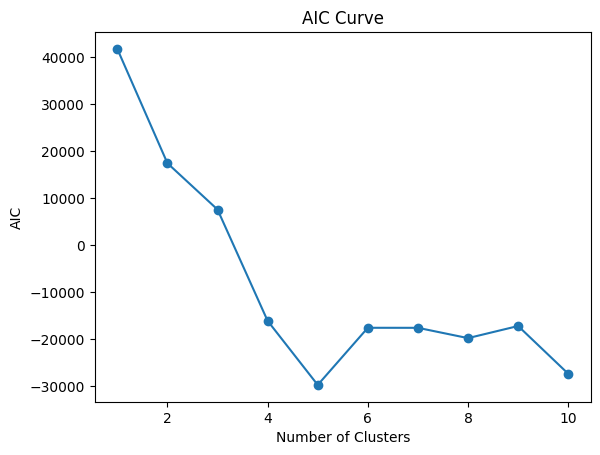

In [23]:
# Plot AIC curve
plot_aic_curve(aics)

In [24]:
# Find the optimal number of clusters
optimal_clusters = find_optimal_clusters(aics)
print(f"The optimal number of clusters is: {optimal_clusters}")

The optimal number of clusters is: 5
